<a href="https://colab.research.google.com/github/uyenvybuile1502/homeworkfuzzy/blob/main/bai6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00


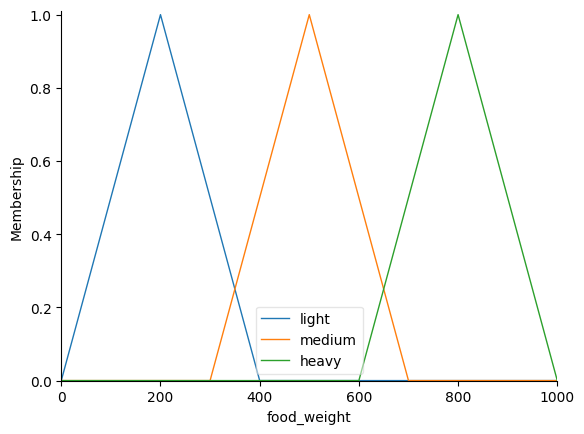

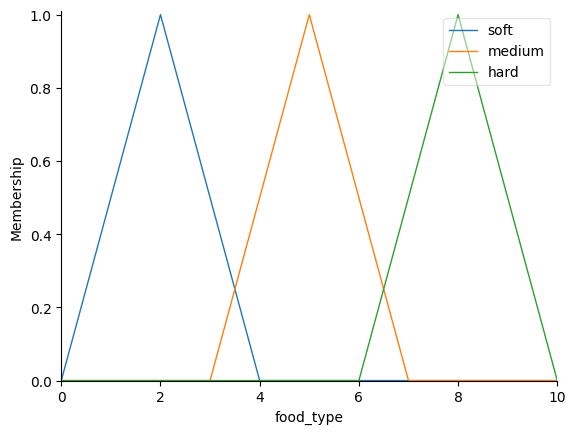

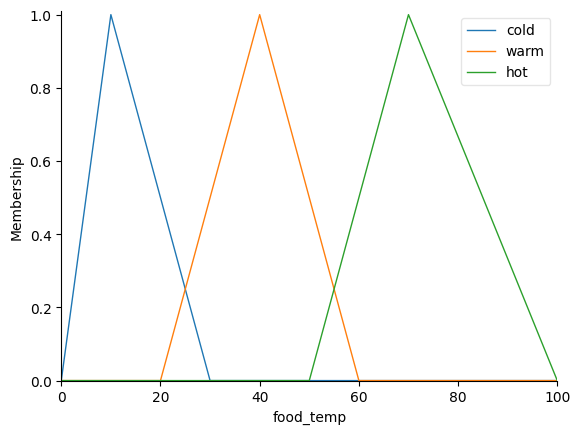

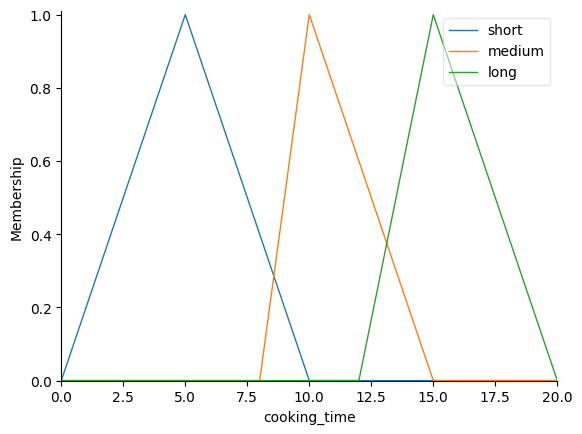

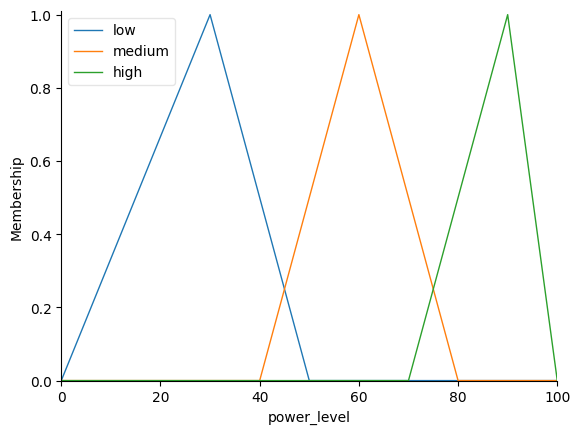

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


food_weight = ctrl.Antecedent(np.arange(0, 1001, 10), 'food_weight')
food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
food_temp = ctrl.Antecedent(np.arange(0, 101, 5), 'food_temp')

cooking_time = ctrl.Consequent(np.arange(0, 21, 1), 'cooking_time')
power_level = ctrl.Consequent(np.arange(0, 101, 5), 'power_level')


food_weight['light'] = fuzz.trimf(food_weight.universe, [0, 200, 400])
food_weight['medium'] = fuzz.trimf(food_weight.universe, [300, 500, 700])
food_weight['heavy'] = fuzz.trimf(food_weight.universe, [600, 800, 1000])

food_type['soft'] = fuzz.trimf(food_type.universe, [0, 2, 4])
food_type['medium'] = fuzz.trimf(food_type.universe, [3, 5, 7])
food_type['hard'] = fuzz.trimf(food_type.universe, [6, 8, 10])

food_temp['cold'] = fuzz.trimf(food_temp.universe, [0, 10, 30])
food_temp['warm'] = fuzz.trimf(food_temp.universe, [20, 40, 60])
food_temp['hot'] = fuzz.trimf(food_temp.universe, [50, 70, 100])

cooking_time['short'] = fuzz.trimf(cooking_time.universe, [0, 5, 10])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [8, 10, 15])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [12, 15, 20])

power_level['low'] = fuzz.trimf(power_level.universe, [0, 30, 50])
power_level['medium'] = fuzz.trimf(power_level.universe, [40, 60, 80])
power_level['high'] = fuzz.trimf(power_level.universe, [70, 90, 100])

rule1 = ctrl.Rule(food_weight['light'], cooking_time['short'])
rule2 = ctrl.Rule(food_weight['medium'], cooking_time['medium'])
rule3 = ctrl.Rule(food_weight['heavy'], cooking_time['long'])

rule4 = ctrl.Rule(food_type['soft'], power_level['low'])
rule5 = ctrl.Rule(food_type['medium'], power_level['medium'])
rule6 = ctrl.Rule(food_type['hard'], power_level['high'])

rule7 = ctrl.Rule(food_temp['cold'], cooking_time['long'])
rule8 = ctrl.Rule(food_temp['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(food_temp['hot'], cooking_time['short'])

rule10 = ctrl.Rule(food_weight['heavy'] & food_type['hard'] & food_temp['cold'],
                   (cooking_time['long'], power_level['high']))

rule11 = ctrl.Rule(food_weight['medium'] & food_type['soft'] & food_temp['warm'],
                   (cooking_time['medium'], power_level['low']))

rule12 = ctrl.Rule(food_weight['light'] & food_type['medium'] & food_temp['hot'],
                   (cooking_time['short'], power_level['medium']))


microwave_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

microwave_simulation = ctrl.ControlSystemSimulation(microwave_ctrl)

food_weight.view()
food_type.view()
food_temp.view()

cooking_time.view()
power_level.view()

